# 형태소 분석
 1. text file 읽기
 2. 명사 추출 Kkma
 3. 전처리 단어길이 제한 숫자 제외
 4. Wordcloud

In [5]:
# 패키지 설치

from konlpy.tag import Kkma # class
from wordcloud import WordCloud

# object 생성 : 형테소 분석이 가능한 객체를 생성
kkma = Kkma()


# 1. text file 읽기 : text_data.txt

In [4]:
file = open('C:/IITT/4_Python-II/workplace/chap07_Textmining/data/text_data.txt', mode='r', encoding='utf-8')
docs = file.read()
print('text file 읽기')
print(docs)
len(docs) # 89

# docs -> sentence
ex_sent = kkma.sentences(docs)
print('\n text file -> 문장 나누기 ')
print(ex_sent,'\n')
len(ex_sent) # 4

# docs -> nouns
ex_nouns = kkma.nouns(docs)
print('\n text file -> 단어 나누기')
print(ex_nouns)
len(ex_nouns) # 13

text file 읽기
형태소 분석을 시작합니다. 나는 데이터 분석을 좋아합니다. 
직업은 데이터 분석 전문가 입니다. Text mining 기법은 2000대 초반에 개발된 기술이다.

 text file -> 문장 나누기 
['형태소 분석을 시작합니다.', '나는 데이터 분석을 좋아합니다.', '직업은 데이터 분석 전문가 입니다.', 'Text mining 기법은 2000대 초반에 개발된 기술이다.'] 


 text file -> 단어 나누기
['형태소', '분석', '나', '데이터', '직업', '전문가', '기법', '2000', '2000대', '대', '초반', '개발', '기술']


13

# 2. 명사 추출 : kkma

In [6]:
nouns_word = [] # 명사 저장

for sent in ex_sent: # '형태소 분석을 시작합니다.'
    for noun in kkma.nouns(sent): # 문장 -> 명사
        nouns_word.append(noun)

print(nouns_word)
len(nouns_word) # 15

['형태소', '분석', '데이터', '분석', '직업', '데이터', '분석', '전문가', '기법', '2000', '2000대', '대', '초반', '개발', '기술']


15

# 3. 전처리 : 단어 수 세기
- 단어 길이 제한 (1음절 이상), 숫자 제외

In [11]:
from re import match

nouns_count = {} # 단어 카운트
for word in nouns_word:
    if len(word) > 1 and not(match('^[0-9]',word)) :
        nouns_count[word] = nouns_count.get(word,0) + 1

print(nouns_count)
len(nouns_count)


# top5 word
from collections import Counter # class

counter = Counter(nouns_count)
top5_word = counter.most_common(5)
print('\n top5 word !!!')
for word in top5_word:
    print(word)


{'형태소': 1, '분석': 3, '데이터': 2, '직업': 1, '전문가': 1, '기법': 1, '초반': 1, '개발': 1, '기술': 1}

 top5 word !!!
('분석', 3)
('데이터', 2)
('형태소', 1)
('직업', 1)
('전문가', 1)


# 4. WordCloud

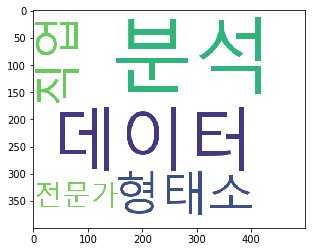

In [12]:

wc= WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
              width=500, height=400,
              max_words=100, max_font_size=150,
              background_color='white')
wc_result = wc.generate_from_frequencies(dict(top5_word)) # dict

import matplotlib.pyplot as plt
plt.imshow(wc_result)